**Question 1**

Sterling's approximation to $n!$ is

$S(n) = \sqrt{2\pi n}(\frac{n}{e})^2$

where $e$ is the base of the natural logarithm. Write code that computes $100(S(n) - n!)/n!$, which is the percent difference between $S(n)$ and $n!$. What is the percent difference when $n = 10$? 

ANSWER: The percent difference is about 0.83% (if we do not take the absolute value, it is about -0.83%). 

In [6]:
import numpy as np 

def S( n ):
    square_root_component = np.sqrt( np.pi * 2 * n )
    squared_component = ( n / np.exp( 1 ) ) ** n
    return square_root_component * squared_component

def factorial( n ):
    if n == 0:
        return 1
    result = 1
    for i in range( 1, n + 1 ):
        result = result * i
    return result

def percent_diff( n ):
    numerator = S( n ) - factorial( n )
    denominator = factorial( n )
    return 100 * ( numerator / denominator )

n = 10
print( "Sterling Approximation: ", S( n ) )
print( "Actual Factorial:", factorial( n ) )
print( f"Percent Diff {percent_diff( n )}%" )

Sterling Approximation:  3598695.6187410373
Actual Factorial: 3628800
Percent Diff -0.8295960443938127%


**Question 2**

Find all the roots of the function 

$f(x) = cos(5x) - x^3$

using Newton's method. Your answers should be accurate within $\pm 0.00001$.

ANSWER: 

- Root 1: $x = -0.82382$
- Root 2: $x = -0.32076$
- Root 3: $x = 0.30830$

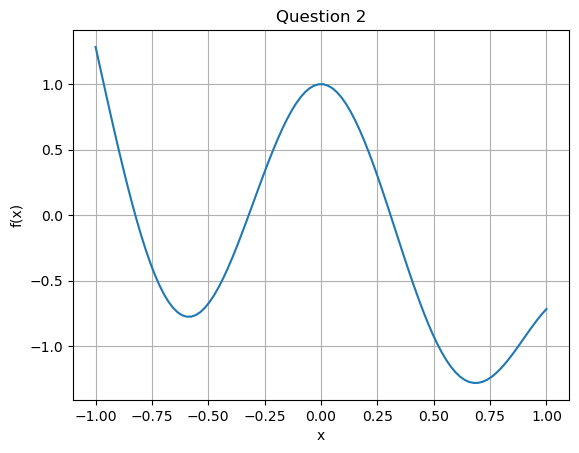

-0.823816974762750
-0.320760855447399
0.308297835330040


In [21]:
import sympy as sp
import numpy as np 
import matplotlib.pyplot as plt 

# Plot to see how many roots there are 
def f(x):
    return np.cos(5 * x) - x**3

x = np.linspace(-1, 1, 100) # Change these parameters to see where the roots are

plt.close()
plt.plot(x, f(x)) 
plt.title("Question 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

# Newton's Method - We know there is only 1 root from the plot

eps = 10 ** -6

x = sp.symbols('x')
f = sp.cos(5 * x) - x**3
f_prime = sp.diff(f, x)

# Root 1

x_old = -0.8  #initial guess 

while (f.subs(x, x_old + eps) * f.subs(x, x_old - eps) > 0):
    x_new = x_old - f.subs(x, x_old) / f_prime.subs(x, x_old)
    x_old = x_new

print(x_old)

# Root 2

x_old = -0.35  #initial guess 

while (f.subs(x, x_old + eps) * f.subs(x, x_old - eps) > 0):
    x_new = x_old - f.subs(x, x_old) / f_prime.subs(x, x_old)
    x_old = x_new

print(x_old)

# Root 3 

x_old = 0.3  #initial guess 

while (f.subs(x, x_old + eps) * f.subs(x, x_old - eps) > 0):
    x_new = x_old - f.subs(x, x_old) / f_prime.subs(x, x_old)
    x_old = x_new

print(x_old)

**Question 3**

Use Simpson's rule to evaluate 

$\int_{0}^{1} e^{-2x} sin(3x^2) dx$

Estimate the number of significant figures in your result when you use 20 subintervals. 

ANSWER: 

- There are roughly **5 significant figures** because the first 5 digits seem to stabilize across the first 20 intervals.  
- Evaluates to 0.15347

In [36]:
import numpy as np

def simpsons_rule( f, a, b, N ):
    delta_x = ( b - a ) / N
    # for loop 1
    summation1 = 0
    for i in range( 1, N ):
        x_i = a + i * delta_x
        summation1 += f( x_i )
    # for loop 2
    summation2 = 0
    for i in range( 1, N + 1 ):
        x_im1 = a + ( i - 1 ) * delta_x
        x_i = a + i * delta_x
        summation2 += f( ( x_im1 + x_i ) / 2 )
    # part of Simpson's in brackets
    brackets = f( a ) + f(  b) + 2 * summation1 + 4 * summation2
    # final result
    return ( delta_x / 6 ) * brackets

def f( x ):
    return np.exp( -2 * x ) * np.sin( 3 * x**2 )

a = 0
b = 1

print("")
for N in range( 1, 20 + 1 ):
    approx = simpsons_rule( f, a, b, N )
    print( f"{N}    {approx}" )


1    0.17035701012230856
2    0.15494226081082094
3    0.1537503925341375
4    0.15355975407176342
5    0.15350870632127828
6    0.153490544077784
7    0.1534827991801712
8    0.15347905228783112
9    0.15347706243477346
10    0.1534759270112226
11    0.153475241088697
12    0.1534748070109305
13    0.15347452150758048
14    0.15347432751318993
15    0.15347419197689846
16    0.15347409497498626
17    0.15347402407552346
18    0.15347397128462562
19    0.15347393132450446
20    0.15347390062805555


**Question 4**

Use fourth-order Runge-Kutta to solve the system of ordinary differential equations 

$\frac{dx}{dt} = \frac{1}{2} (x^2 - y^2)$

$\frac{dy}{dt} = xy + 3$

with initial conditions $x(0) = 1$ and $y(0) = -1$. Have your code plot $x$ and $y$ versus $t$ for $0 \leq t \leq 10$. Estimate the number of significant figures in your result for $x(10)$ when you use 20 timesteps.

ANSWER: 

- There are roughly **6 significant figures** because the first 6 digits seem to stabilize around N=20.
- x(10) = -1.73205



13    -1.7320633587854766
14    -1.7320501059832476
15    -1.7320496768329223
16    -1.732049587276077
17    -1.7320500964606564
18    -1.7320503945019883
19    -1.732050576089995
20    -1.7320507429728005


x(10) = -1.73205


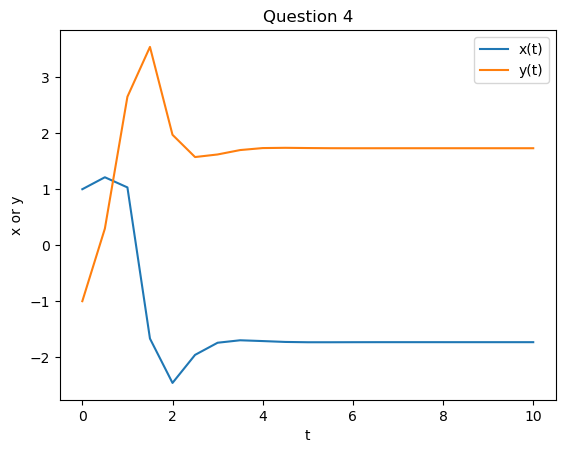

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Define system of ODEs
def f1(t, x, y):
    return 0.5 * (x**2 - y**2)

def f2(t, x, y):
    return x*y + 3

# RK4
def rk4(t0, tf, N):
    h = (tf - t0) / N
    t = np.zeros(N + 1)
    x = np.zeros(N + 1)
    y = np.zeros(N + 1)

    # Initial conditions
    t[0] = t0
    x[0] = 1.0
    y[0] = -1.0

    # iteration
    for i in range(N):
        th = t[i] + h / 2

        k1x = f1(t[i], x[i], y[i])
        k1y = f2(t[i], x[i], y[i])

        k2x = f1(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)
        k2y = f2(th, x[i] + (h / 2) * k1x, y[i] + (h / 2) * k1y)

        k3x = f1(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)
        k3y = f2(th, x[i] + (h / 2) * k2x, y[i] + (h / 2) * k2y)

        k4x = f1(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)
        k4y = f2(t[i] + h, x[i] + h * k3x, y[i] + h * k3y)

        x[i + 1] = x[i] + (h / 6) * (k1x + 2 * k2x + 2 * k3x + k4x)
        y[i + 1] = y[i] + (h / 6) * (k1y + 2 * k2y + 2 * k3y + k4y)
        t[i + 1] = t[i] + h

    return t, x, y

# Parameters
t0 = 0.0
tf = 10.0
N = 20

print("\n")
for i in range(13, N):
    t, x, y = rk4(t0, tf, i)
    print(f"{i}    {x[-1]}")

t, x, y = rk4(t0, tf, N)
print(f"{N}    {x[-1]}")

print("\n")
print(f"x(10) = {x[-1]:.5f}")

# Plot
plt.plot(t, x, label='x(t)')
plt.plot(t, y, label='y(t)')
plt.xlabel('t')
plt.ylabel('x or y')
plt.legend()
plt.title('Question 4')
plt.show()


**Question 5**

Consider the second-order ODE

$\dot{x} = \dot{x} \ddot{x} - 1$

with initial conditions x(0) = 1, $\dot{x} (0) = 0$. Write this ODE as a system of first-order ODE's. Solve the initial value problem using the scipy function solve_ivp(), and plot a graph of $x(t)$ and $y(t)$ for $0 \leq t \leq 10$.

ANSWER: 

Rewriting the second-order ODE as a system of first-order ODEs: 

- $\dot{x} = y$
- $\dot{y} = xy - 1$
- Initial conditions: $x(0) = 1$, $y(0) = 0$

(Graph plotted below)

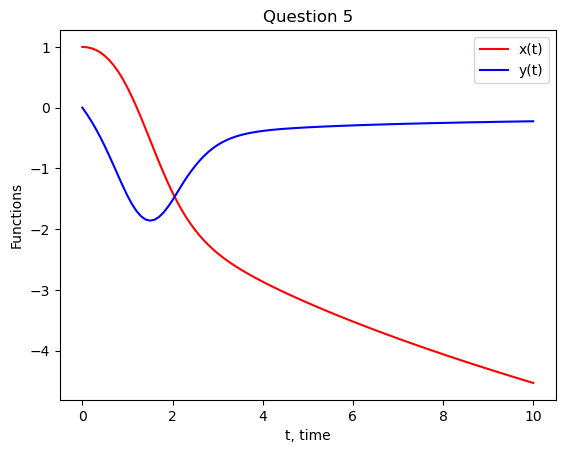

In [41]:
import numpy as np 
import scipy.integrate as si 
import matplotlib.pyplot as plt

# right-hand sides of ODEs 
def F(t, variables): 
    x, y = variables 
    dxdt = y
    dydt = x * y - 1
    return dxdt, dydt

# parameters 
ti = 0.0 # initial time 
tf = 10.0 # final time

# initial conditions 
xi = 1
yi = 0

# solve the ODEs 
tee = np.linspace(ti, tf, 101)
u = si.solve_ivp(F, [ti,tf], [xi,yi], t_eval=tee) 
t = u.t    # independent variable 
x = u.y[0] # first dependent variable 
y = u.y[1] # second dependent variable

# Plot results 
plt.close() 
plt.plot(t, x, 'r', label="x(t)") 
plt.plot(t, y, 'b', label="y(t)")
plt.title("Question 5")
plt.xlabel("t, time")
plt.ylabel("Functions")
plt.legend()
plt.show()

**Question 6**

Use the relaxation method to solve the boundary value problem 

$\frac{d^2y}{dx^2} = -3\frac{dy}{dx}$

with $y(0) = 5$ and $y(1) = 15$. Plot a graph of the solution $y(x)$ for $0 \leq x \leq 1$. (Hint: Discretize the differential equation and solve it for $y_i$ as a function of $y_{i+1}$ and $y_{i-1}$. Make sure your initial guess satisfies the boundary conditions.)

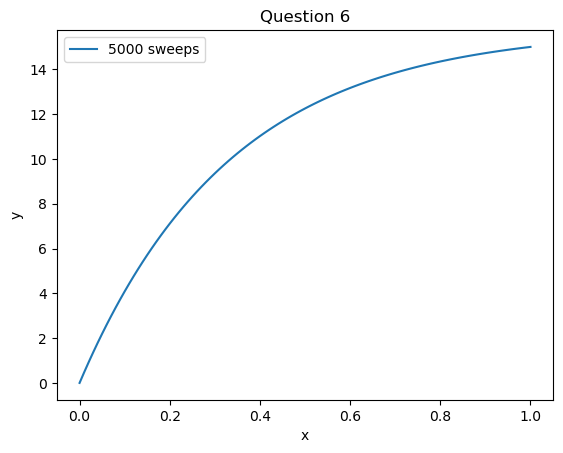

In [59]:
import math
import matplotlib.pyplot as plt

# Parameters
xA, yA = 0.0, 0.0
xB, yB = 1.0, 15.0
N = 101
sweeps = 5000

dx = (xB - xA) / (N - 1)

# Trial solution: straight line y = 15x
y = []
for i in range(N):
    y.append(15.0 * (i * dx))

xs = []
for i in range(N):
    value = i * dx
    xs.append(value)

for s in range(1, sweeps + 1):

    for i in range(1, N - 1):
        dy_dx = (y[i+1] - y[i-1]) / (2 * dx)
        RHS = -3 * dy_dx
        y[i] = -0.5 * (dx**2 * RHS - y[i+1] - y[i-1])  # Solving the second order diff eq approximation for y[i]
    
plt.plot(xs, y, label="5000 sweeps")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Question 6")
plt.legend()
plt.show()

**Question 7**

Use either Lax-Friedrichs method or the method of lines with fourth-order Runge-Kutta to solve the wave equation

$\dot{y} = v$,

$\dot{v} = c^2y''$,

with c = 50. Use the initial conditions 

$y(0) = exp(-x^2)$,

$v(0) = 50x exp(-x^2)$,

and boundary conditions y(-5) = 0, y(5) = 0. Plot graphs of y versus x for various values of time t. 

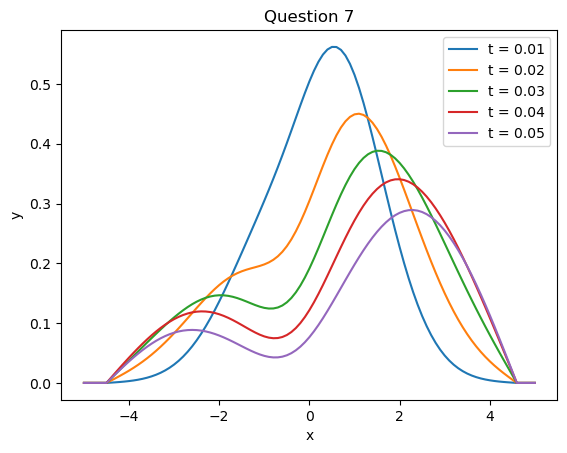

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
xa = -5.0 # Lower x bound
xb = 5.0 # Upper x bound
c = 50
J = 100        # number of spatial intervals
N = 500        # number of timesteps

dx = (xb - xa) / J
dt = 0.05 * dx / c # Time interval

x = np.linspace(xa, xb, J+1)

# Define arrays
y  = np.zeros(J+1)   
v  = np.zeros(J+1)   
yp = np.zeros(J+1)   
vp = np.zeros(J+1)  

# Initial conditions
y0 = np.exp(-(x**2) )
v0 = 50 * x * np.exp( -(x**2) )

y = np.copy(y0)
v = np.copy(v0)

# Time loop
for n in range(1, N+1):

    for j in range(1, J):
        yp[j] = 0.5 * (y[j+1] + y[j-1]) + dt * v[j]
        vp[j] = v[j] + dt * c**2 * (y[j+1] - 2.0*y[j] + y[j-1]) / dx**2

    # Boundary conditions
    # yp[0] = y[0] 
    # yp[J] = y[J]
    yp[-5] = 0
    yp[5] = y[0]
    vp[0] = v[0]
    vp[J] = v[J]

    y = np.copy(yp)
    v = np.copy(vp)

    if n % 100 == 0:
        plt.plot(x, y, label=f"t = {n*dt:.2f}")

# Final plot
plt.title("Question 7")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
